In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Funções que realizam simulação:

In [2]:
#Função que analisa deltaE e devolve o sigma novo para cada sítio da rede

def deltaE_analysis(i:int,j:int,Matrix:tuple,T:float):
    
    sigma_i = Matrix[i][j]
    sigma_f = Matrix[i][j]*(-1) #Muda o valor do spin
    
    #Condições de contorno:
    if (i == N-1 and j == N-1):
        deltaE = - (sigma_f - sigma_i)*(Matrix[i-1][j] + Matrix[0][j] + Matrix[i][j-1] + Matrix[i][0]) #na unidade de J
    elif(i == N-1):
        deltaE = - (sigma_f - sigma_i)*(Matrix[i-1][j] + Matrix[0][j] + Matrix[i][j-1] + Matrix[i][j+1]) #na unidade de J
    elif(j == N-1):
        deltaE = - (sigma_f - sigma_i)*(Matrix[i-1][j] + Matrix[i+1][j] + Matrix[i][j-1] + Matrix[i][0]) #na unidade de J
    else:
        deltaE = - (sigma_f - sigma_i)*(Matrix[i-1][j] + Matrix[i+1][j] + Matrix[i][j-1] + Matrix[i][j+1]) #na unidade de J
    
    #Análise do deltaE
    if (deltaE<0):
        return sigma_f
    else:
        r = math.exp(-deltaE/T)
        z = np.random.uniform(0,1)
        if (r>z):
            return sigma_f
        else:
            return sigma_i

In [3]:
#Simulação de Monte Carlo, passa por todos os sítios da rede, e faz isso com um número de iterações de 
#Monte carlo dado por "n_configs", que será o número de configurações simuladas. 
#A simulação é feita para uma temperatura e um tamanho de rede específicos. 
#Devolve em Matrix a última configuração da rede (para vizualização apenas)
#Devolve em mag o valor absoluto da magnetização média de cada configuração das "n_configs" configurações

def montecarlo(N,orientation,n_configs,T):
    mag = []
    Matrix = [[orientation for i in range(N)] for j in range(N)] #Matrix[i][j] (i=linha, j=coluna) with all spins aligned
    for p in range(n_configs):
        for i in range(N):
            for j in range(N):
                Matrix[i][j] = deltaE_analysis(i,j,Matrix,T)
         
        mag.append(np.absolute(np.sum(Matrix))/(N*N))
    
    return Matrix,mag

In [4]:
#Simulação para diferentes temperaturas e UM tamanho de rede:
#Devolve em Matrix a última configuração da rede (para vizualização apenas) de cada temperatura
#Devolve em mag o valor absoluto da magnetização média de cada configuração das "n_configs" configurações, por T


def montecarlo_variasT(N,orientation,n_configs,T):
    Matrix = []
    mag = []
    
    for i in range(len(T)):
        mat,b = montecarlo(N,orientation,n_configs,T[i])

        #is the last Matrix configuration for each T, for vizualization
        Matrix.append(mat) 

        #is the vector with the magnetization for each of the configurations in passos, for each T
        mag.append(b) 
    
    return Matrix, mag

In [5]:
# Calcula e devolve a magnetização média para cada temperatura em um vetor de tamanho T
#Essa média é calculada com todas as configurações a partir de init iterações (descartamos as primeiras init configurações)

def mag_media(mag,n_configs,T,init):
    return [sum(mag[i][init:])/(n_configs-init) for i in range (len(T))] 

# Tipos de plots para vizualização:

In [108]:
#Plot para ver a última configuração simulada por T e por N: você vê a rede quadrada

#Chamar da seguinte maneira: fig_rede(Matrix_N[i][j],N_plot[i],n_configs,T[j]), 

#i = índice que define o N; j = índice que define a T


def fig_rede(Matrix,N,n_configs,T):
    #Mostra a matriz como uma figura
    plt.matshow(Matrix,cmap='Greys',origin='upper',extent=(0, N, N, 0)) 
    
    #Legenda para as marcações branca e preta na rede
    patches = [mpatches.Patch(color='black',label="Spin +1"), #Se todos os spins estiverem alinhados igualmente,
               mpatches.Patch(color='white',label="Spin -1")] # o mapa será branco independente de ser -1 ou 1 
                                                        #devido ao modo como a função colormap distribue cores.
    
    plt.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.title('MC na rede %1.fx%1.f após %1.f passos e T=%1.4f' %(N,N,n_configs,T),y=1.08)
    
    plt.savefig('Simulação T=%1.3f e rede N=%1.f .png' %(T,N),bbox_inches="tight" )

    plt.show()
    
    return 

In [115]:
#Plot para ver um gŕafico da magnetização para todas as configurações, Y:mag/config X:n_configs
#Chamar da seguinte maneira: fig_mag_por_config(mag_N[i],n_configs,mag_med_N[i],T,posicoes,N_plot[i])
#o índice i chama o N certo
#Ela define vetores T_plot, mag_plot, mag_med_plot que terão somente as T,mag,mag_med que vc quer que sejam 
#plotada, definidas pelas posições
#Pois se plotar todas as T fica muito poluído

def fig_mag_por_config(mag,n_configs,mag_med,T,posicoes,N):
    plt.figure(figsize=(6,4))
    
    x_plot = [i for i in range(n_configs)]
    
    T_plot = []
    mag_plot = []
    mag_med_plot = []
    
    for i in (posicoes):
        T_plot.append(T[i])
        mag_plot.append(mag[i])
        mag_med_plot.append(mag_med[i])
    
    color = ['C0','C1','C2','C3','C4','C5','C6']
    
    for i in range(len(posicoes)):
        plt.plot(x_plot,mag_plot[i],label="T=%1.4f"%T_plot[i])
        plt.hlines(mag_med_plot[i],0,n_configs,color[i])
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Número de iterações que geram configurações')
    plt.ylabel('Magnetização de cada configuração')
    plt.title('Magnetização para diferentes temperaturas, N = %1i"'%N)
    
    plt.savefig('Simulação varias T e rede N=%1.f .png' %(N),bbox_inches="tight" )
    
    plt.show()

In [80]:
# Plot para ver magnetização média por temperatura para diferentes redes de tamanho N:
#Chamar da seguinte maneira: fig_mag_por_T(mag_med_N,T,N)
#Em que N é um vetor com os tamanhos de rede simulados, em ordem, também salvar nos vetores:
#mag_med_N a magnetização média para cada simulação de rede tamanho N

def fig_mag_por_T(mag_med_N,T,N):
    plt.figure(figsize=(5,9))
    
    for i in range(len(N)):
        plt.plot(T,mag_med_N[i],'-o',label="N=%1i"%N[i])
    
    plt.vlines(2.269185,0,0.8,colors='k',linestyles='dashed')
    
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Temperatura [$k_BT$ / J]')
    plt.ylabel('Magnetização média $|m|$')
    plt.ylim(0,1.02)
    plt.title('Magnetização para diferentes redes de NxN')
    
    plt.savefig('Simulação varias T e varios N .png',bbox_inches="tight")


# Agora começa

## Parâmetros

In [135]:
#Parametros fixos sempre
up = 1 ; down = -1
orientation = down

#Parametros fixos para todas as simulações
np.random.seed(1)
T = [0.1,1.2,2,2.2,2.269185,2.28,2.4,2.8,3.4,4] #Temperatura crítica é Tc = 2.269185
n_configs = 300 #número de configurações geradas/iterações de Monte Carlo


#Parâmetros que devem ser modificados por simulação:
#N = ; #Tamanho de uma lateral da rede quadrada

N_plot = [0 for i in range(5)]
mag_N = [0 for i in range(5)]
Matrix_N = [0 for i in range(5)]
mag_med_N = [0 for i in range(5)]


## N=8, i = 0

In [26]:
#Para simular uma rede de tamanho N
N = 8
i = 0
N_plot[0] = N

Matrix_N[0], mag_N[0] = montecarlo_variasT(N,orientation,n_configs,T)


In [27]:
i = 0
init = 100 #Número de configurações iniciais (antes do equilíbrio) que serão descartadas para a média
mag_med_N[0] = mag_media(mag_N[0],n_configs,T,init)
print(T)

[0.1, 1.2, 2, 2.2, 2.269185, 2.28, 2.4, 2.8, 3.4, 4]


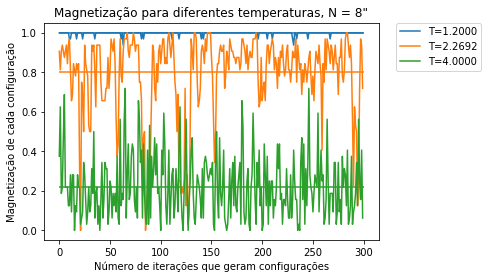

In [116]:
#Quero as seguintes posições de T:
i = 0
posicoes = [T.index(1.2),T.index(2.269185),T.index(4)]

fig_mag_por_config(mag_N[0],n_configs,mag_med_N[0],T,posicoes,N_plot[i])

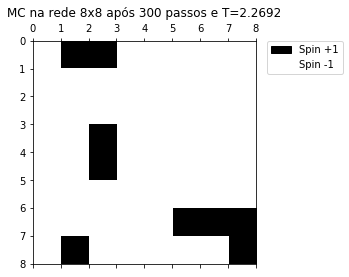

In [128]:
i = 0
fig_rede(Matrix_N[0][4],N_plot[0],n_configs,T[4])

## N=16, i = 1

In [18]:
#Para simular uma rede de tamanho N
N = 16
i = 1
N_plot[1] = N

Matrix_N[1], mag_N[1] = montecarlo_variasT(N,orientation,n_configs,T)


In [19]:
i = 1
init = 100 #Número de configurações iniciais (antes do equilíbrio) que serão descartadas para a média
mag_med_N[i] = mag_media(mag_N[i],n_configs,T,init)
print(T)

[0.1, 1.2, 2, 2.2, 2.269185, 2.28, 2.4, 2.8, 3.4, 4]


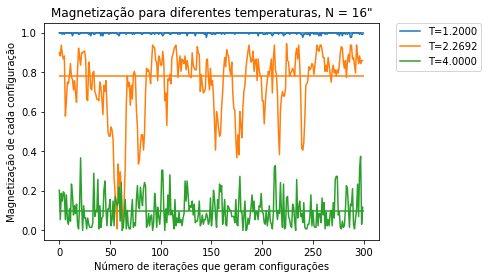

In [117]:
#Quero as seguintes posições de T:
i = 1
posicoes = [T.index(1.2),T.index(2.269185),T.index(4)]

fig_mag_por_config(mag_N[i],n_configs,mag_med_N[i],T,posicoes,N_plot[i])

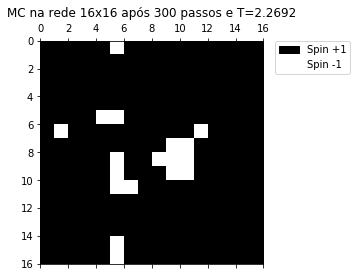

In [127]:
i = 1
fig_rede(Matrix_N[i][4],N_plot[i],n_configs,T[4])

## N=32, i = 2

In [21]:
#Para simular uma rede de tamanho N
N = 32
i = 2
N_plot[i] = N

Matrix_N[i], mag_N[i] = montecarlo_variasT(N,orientation,n_configs,T)



In [39]:
i = 2
init = 100 #Número de configurações iniciais (antes do equilíbrio) que serão descartadas para a média
mag_med_N[i] = mag_media(mag_N[i],n_configs,T,init)
print(T)

[0.1, 1.2, 2, 2.2, 2.269185, 2.28, 2.4, 2.8, 3.4, 4]


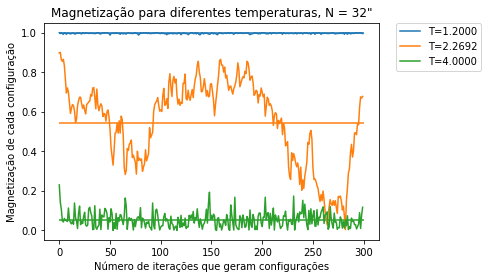

In [118]:
#Quero as seguintes posições de T:
i = 2
posicoes = [T.index(1.2),T.index(2.269185),T.index(4)]

fig_mag_por_config(mag_N[i],n_configs,mag_med_N[i],T,posicoes,N_plot[i])

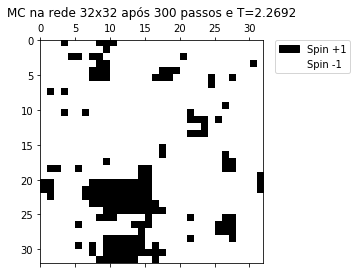

In [126]:
i = 2
fig_rede(Matrix_N[i][4],N_plot[i],n_configs,T[4])

## N=64, i = 3


In [41]:
#Para simular uma rede de tamanho N
N = 64
i = 3 
N_plot[i] = N

Matrix_N[i], mag_N[i] = montecarlo_variasT(N,orientation,n_configs,T)



In [43]:
i = 3
init = 100 #Número de configurações iniciais (antes do equilíbrio) que serão descartadas para a média
mag_med_N[i] = mag_media(mag_N[i],n_configs,T,init)
print(T)

[0.1, 1.2, 2, 2.2, 2.269185, 2.28, 2.4, 2.8, 3.4, 4]


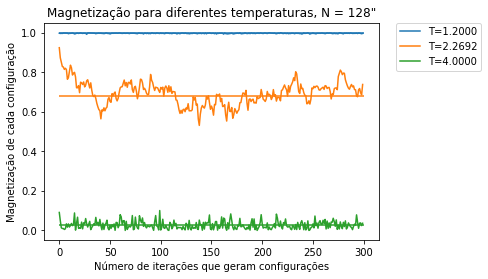

In [119]:
#Quero as seguintes posições de T:
i = 3
posicoes = [T.index(1.2),T.index(2.269185),T.index(4)]

fig_mag_por_config(mag_N[i],n_configs,mag_med_N[i],T,posicoes,N)

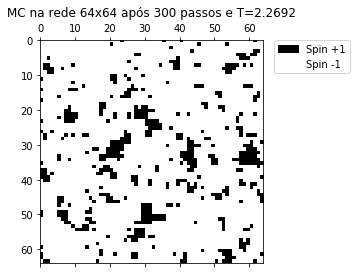

In [125]:
i = 3
fig_rede(Matrix_N[i][4],N_plot[i],n_configs,T[4])

## N = 128, i = 4

In [114]:
#Para simular uma rede de tamanho N
N = 128
i = 4 
N_plot[i] = N

Matrix_N[i], mag_N[i] = montecarlo_variasT(N,orientation,n_configs,T)


In [120]:
i = 4
init = 100 #Número de configurações iniciais (antes do equilíbrio) que serão descartadas para a média
mag_med_N[i] = mag_media(mag_N[i],n_configs,T,init)
print(T)

[0.1, 1.2, 2, 2.2, 2.269185, 2.28, 2.4, 2.8, 3.4, 4]


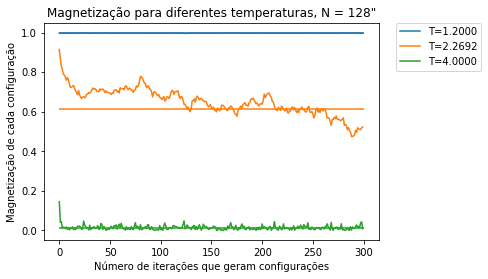

In [121]:
#Quero as seguintes posições de T:
i = 4
posicoes = [T.index(1.2),T.index(2.269185),T.index(4)]

fig_mag_por_config(mag_N[i],n_configs,mag_med_N[i],T,posicoes,N)

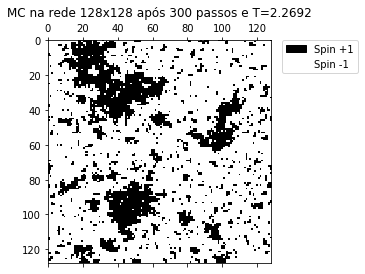

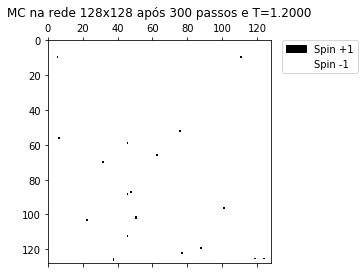

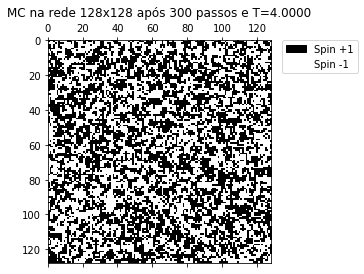

In [131]:
i = 4
fig_rede(Matrix_N[i][4],N_plot[i],n_configs,T[4])
fig_rede(Matrix_N[i][1],N_plot[i],n_configs,T[1])
fig_rede(Matrix_N[i][9],N_plot[i],n_configs,T[9])

In [133]:
i = 4
#Para simular uma rede de tamanho N
N = 128
N_plot[i] = N
T_plus = [2.27,2.268]

Matrix_plus, mag_plus = montecarlo_variasT(N,orientation,n_configs,T_plus)


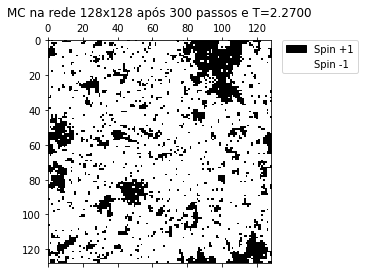

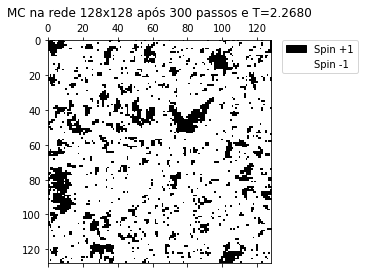

In [134]:
fig_rede(Matrix_plus[0],N_plot[i],n_configs,T_plus[0])
fig_rede(Matrix_plus[1],N_plot[i],n_configs,T_plus[1])

# Plot final

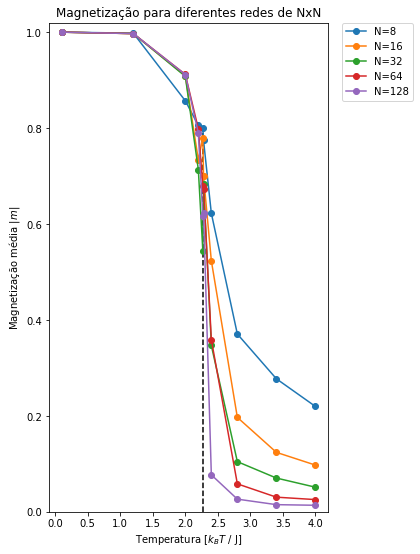

In [123]:
fig_mag_por_T(mag_med_N,T,N_plot)